<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: J. Vicente Onetto
- Nombre de alumno 2: Renzo Zanca


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/...../)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
try:
    from google.colab import drive
    drive.mount("/content/drive", force_remount= True)
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd

path = 'diabetes_data.csv'
df = pd.read_csv(path)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

### EDA

In [2]:
# EDA:

df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


Notamos que todas las variables son numéricas, teniendo en su mayoria valores categoricos binarios.

In [3]:
# null values:
df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

No hay presencia de valores nulos

In [4]:
columns = df.columns
non_categorical_features = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']
categorical_features = columns.difference(non_categorical_features).to_list()
df[categorical_features].apply(pd.Series.value_counts)

,CholCheck,Diabetes,DiffWalk,Fruits,HeartDiseaseorAttack,HighBP,HighChol,HvyAlcoholConsump,PhysActivity,Sex,Smoker,Stroke,Veggies
0.0,1749,35346,52826,27443,60243,30860,33529,67672,20993,38386,37094,66297,14932
1.0,68943,35346,17866,43249,10449,39832,37163,3020,49699,32306,33598,4395,55760


<Axes: >

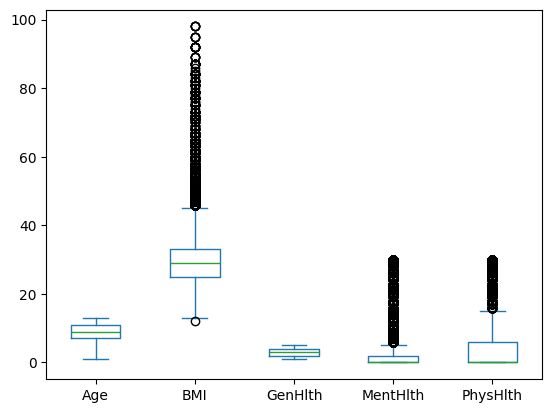

In [5]:
df[non_categorical_features].plot(kind='box')

Notamos que las features BMI, MentHlth y PhysHlth tienes valores muy altos que podrian ser considerados outliers. Sin embargo, debido a lo que representan pueden ser información muy valiosa para el modelo y no se considera beneficioso eliminarlos. Por ejemplo, un índice de masa corporal alto puede estar fuertemente relacionado a la presencia de diabetes debido a malos hábitos alimenticiosos. Por el contrario, el nivel de salud física y mental puede entregarle información útil al modelo para decidir si es probable que tenga diabetes.  

Por otro lado, a pesar de no ser muy necesario debido al tipo de modelo a utilizar, se sugiere mantener consistencia estandarizando entre 0 y 1 estas variables.

### Modelo Clasificación

In [6]:
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Configuración
set_config(transform_output="pandas")
rs = 42 # random state

In [7]:
# division train y test:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=rs)

In [8]:
# procesador:
categorical_features.remove('Diabetes')
preprocessor = ColumnTransformer([
    ("num", MinMaxScaler(), non_categorical_features),
    ("categorical", "passthrough", categorical_features)
])
preprocessor.set_output(transform="pandas")

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 ['Age', 'BMI', 'GenHlth', 'MentHlth',
                                  'PhysHlth']),
                                ('categorical', 'passthrough',
                                 ['CholCheck', 'DiffWalk', 'Fruits',
                                  'HeartDiseaseorAttack', 'HighBP', 'HighChol',
                                  'HvyAlcoholConsump', 'PhysActivity', 'Sex',
                                  'Smoker', 'Stroke', 'Veggies'])])

In [9]:
# pipeline:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(random_state=rs))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age', 'BMI', 'GenHlth',
                                                   'MentHlth', 'PhysHlth']),
                                                 ('categorical', 'passthrough',
                                                  ['CholCheck', 'DiffWalk',
                                                   'Fruits',
                                                   'HeartDiseaseorAttack',
                                                   'HighBP', 'HighChol',
                                                   'HvyAlcoholConsump',
                                                   'PhysActivity', 'Sex',
                                                   'Smoker', 'Stroke',
                                                   'Veggies'])])),
                ('model',
                 XGBClassifier(base_score=None...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [10]:
# predict:
y_pred = pipeline.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     11782
         1.0       0.73      0.79      0.76     11782

    accuracy                           0.75     23564
   macro avg       0.75      0.75      0.75     23564
weighted avg       0.75      0.75      0.75     23564



2.

- ¿Es acaso un buen predictor de diabetes?

Si, obtiene un valor de f1-score razonablemente alto (0.75) y se destaca un alto recall para la clase positiva (0.79), logrando detectar la mayoria de los casos de diabetes. Sin embargo al ser un problema binario, las métricas podrian ser un poco más altas.


- ¿Qué buscan explicar las métricas utilizadas?

Accuracy explica la razón de casos bien clasificados versus el total. Precision indica para todas las predicciones positivas, ¿Qué porcentaje fue correcto?. Por otro lado recall computa la proporción de casos de la clase que el modelo identificó correctamente. Finalmente f1-score calcula la media armónica de precision y recall, entregando un balance entre la interpretación de ambas.


- ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?

No directamente. La única manera de medir el impacto de la selección de features es comparar el valor de estas métricas seleccionando distintas features y eligiendo el mejor modelo.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

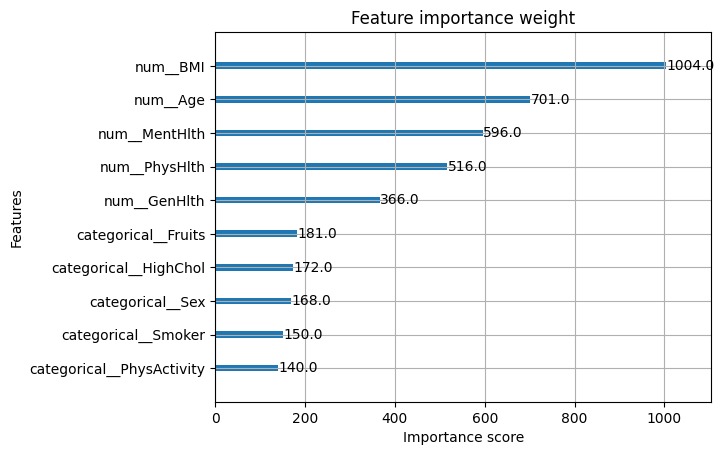

In [11]:
import matplotlib.pylab as plt
from matplotlib import pyplot
from xgboost import plot_importance

model = pipeline.named_steps['model']
plot_importance(model, max_num_features=10, importance_type='weight', title='Feature importance weight')
plt.show()

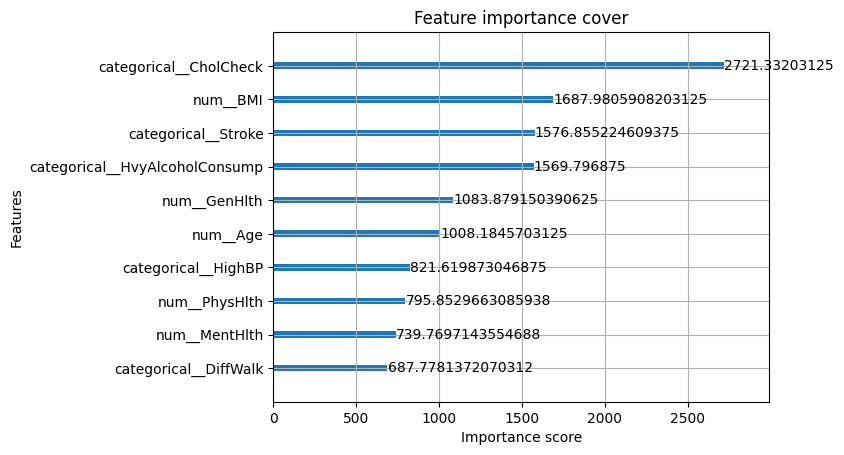

In [12]:
plot_importance(model, max_num_features=10, importance_type='cover', title='Feature importance cover')
plt.show()

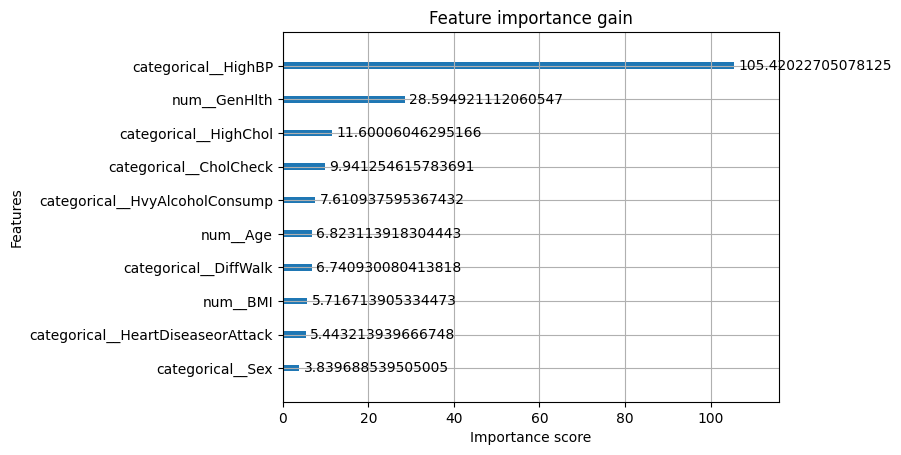

In [13]:
plot_importance(model, max_num_features=10, importance_type='gain', title='Feature importance gain')
plt.show()

2. Notamos que obtenemos resultados totalmente diferentes y no compatibles. Esta diferencia se debe a que el tipo de importancia de cada técnica es diferente. En primer lugar weight computa la cantidad de veces que aparece la feature en un árbol, obteniendo como más relevante a BMI, edad y salud mental. Por otro lado gain es una métrica propia de estos modelos que cuantifica la calidad de un árbol, con esto las features que más aumentan el gain son la presión alta (HighBP), GenHlth y colesterol alto. Por último cover cuantifica el número promedio de samples que son afectados en los splits para cada feature, obteniendo como más relavantes CholCheck, BMI y Stroke.

3. A pesar de entregar bastante información sobre las features más importantes, este método no presenta la mejor interpretación. Esto se debe a la debilidad de que indica las features relevantes, pero no explican que valores determinan que el modelo clasifique sobre una clase u otra. Por ejemplo, indican que el índice de masa corporal es relevante, pero no indican desde que números es más probable clasificar con diabetes.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [14]:
import numpy as np
from sklearn.metrics import accuracy_score

def permutacion_importancia(modelo, X, y, n_repeats=10, random_state=None):
    rng = np.random.RandomState(random_state)
    baseline_score = accuracy_score(y, modelo.predict(X))
    importancias = np.zeros((X.shape[1], n_repeats))

    for i in range(X.shape[1]):
        for j in range(n_repeats):
            X_permutado = X.copy()
            X_permutado.iloc[:, i] = rng.permutation(X_permutado.iloc[:, i].values)
            score = accuracy_score(y, modelo.predict(X_permutado))
            importancias[i, j] = baseline_score - score

    importancias_mean = importancias.mean(axis=1)
    importancias_std = importancias.std(axis=1)

    return pd.DataFrame({
        "feature": X.columns,
        "importance_mean": importancias_mean,
        "importance_std": importancias_std
    }).sort_values(by="importance_mean", ascending=False).reset_index(drop=True)

pipeline.fit(X_train, y_train)
df_perm = permutacion_importancia(pipeline, X_test, y_test, n_repeats=10, random_state=rs)

In [15]:
# 1.
from sklearn.inspection import permutation_importance

result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=rs, scoring='accuracy', n_jobs=-1)

In [16]:
# 2.
importances_std = result.importances.std(axis=1)
df_std = pd.DataFrame({
    "feature": X.columns,
    "std": result.importances_std
})
df_std.sort_values(by='std', ascending=False, inplace=True)
df_std.head()

,feature,std
11,GenHlth,0.002474
0,Age,0.002126
4,BMI,0.001605
16,HighBP,0.001466
2,HighChol,0.001116


La desviación estandar en este caso cuantifica que tan consistente es el error de las features al hacer las permutaciones 30 veces. Notamos que GenHlth, Age y BMI obtiene un mayor desviación, indicando que la variación del error al hacer sus permutaciones es más variables tras las distintas repeticiones.

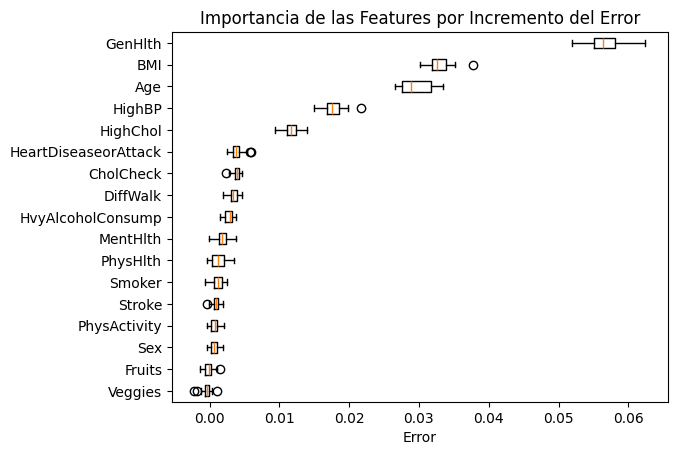

In [18]:
# 3.
# nota: código basado en clase de interpretabilidad

perm_sorted_idx = result.importances_mean.argsort() # indices de features ordenadas por error
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    tick_labels=np.array(X_test.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

4.

**- ¿Cómo mide la importancia de las features su propuesta?**

Para cada feature, permuta sus valores y mide el accuracy con los datos permutados, repitiendo el proceso 30 veces. Luego el promedio de estos valores se compara con el accuracy de los datos no permutados, computando cuanto error aumenta tras permutar la feature. Naturalmente, las features que al no ser incluidas (permutadas) hacen que aumente más el error, terminan siendo las features más importantes.

**- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido?**

Las features de mayor impacto son GenHlth, BMI, Age, HighBP, HighChol. La salud general tiene sentido que tenga una correlación muy alta, pues al tener diabetes, este parámetro debe ser bajo en general. El BMI puede tener una fuerte correlación debido a que personas con diabetes pueden tener un mayor peso. La edad puede tener un fuerte impacto debido al rango que se encuentra en la data (1 a 13 años), pues niños de muy baja edad resulta poco probable tener diabetes. Por último la presión y colesterol alto pueden tener alguna especie de correlación médica que hace que pueda ser interpretable en el mundo médico. En general parecen tener sentido las features más importantes para el modelo.    

**- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?**

Las conclusiones son bastante similares, pues combinan los resultados de los 3 métodos de la sección anterior (weight, coverage, gain). El top 5 de features de este método aparecen en los top 2 de importancia para la sección anterior.

**- Nombre y explique 3 ventajas y 3 desventajas del método implementado.**

##### Ventajas

- Fácil interpretación: Resulta intuitivo que al permutar, las features que aumentan el error son las más importantes.
- Agnóstico: Se puede utilizar con cualquier tipo de modelo, haciendolo muy facil de comparar entre modelos.
- No necesita re-entrenar el modelo: Al utilizar el modelo después del fit, se puede ahorrar el tiempo de entrenamiento, haciendolo más eficiente.

##### Desventajas

- Costoso computacionalmente: Requiere múltiples evaluaciones del modelo por feature y repetición.
- Dependiente del conjunto de datos: Si el test set es pequeño o no representativo, las importancias pueden no ser confiables.
- Puede subestimar features correlacionadas: Cuando dos features están altamente correlacionadas, permutar una puede no afectar mucho la predicción, subestimando su importancia.

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [19]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [20]:
import shap


# 1) Extraer modelo y preprocesador del pipeline
model = pipeline.named_steps["model"]           # XGBClassifier
preproc = pipeline.named_steps["preprocessor"] # ColumnTransformer

# 2) Transformar el conjunto de test
X_test_proc = preproc.transform(X_test)

# 3) Crear el TreeExplainer y calcular SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_proc)

# Dependiendo de la versión de shap:
# - si shap_values es una lista (uno por clase), nos quedamos con la clase positiva:
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# 4) Ponerlos en un DataFrame para visualización
feature_names = preproc.get_feature_names_out()
shap_df = pd.DataFrame(shap_values, columns=feature_names)

# Ver los SHAP values de las primeras 5 instancias
shap_df.head(5)


/Users/vicenteonetto/Desktop/FCFM/11o semestre/Programación Científica para Ciencias de Datos/venvMDS7202/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,num__Age,num__BMI,num__GenHlth,num__MentHlth,num__PhysHlth,categorical__CholCheck,categorical__DiffWalk,categorical__Fruits,categorical__HeartDiseaseorAttack,categorical__HighBP,categorical__HighChol,categorical__HvyAlcoholConsump,categorical__PhysActivity,categorical__Sex,categorical__Smoker,categorical__Stroke,categorical__Veggies
0,0.192400,-0.675378,1.145876,0.061001,0.184467,0.026960,-0.049467,0.022613,-0.023322,-0.623051,0.289678,0.035031,0.020658,-0.124083,-0.013418,-0.023906,-0.023810
1,0.575245,0.548359,0.216856,0.062641,-0.002888,0.021952,0.121022,-0.020111,-0.061521,-0.613815,-0.289867,0.021411,0.051956,-0.127224,0.016209,-0.011934,-0.041483
2,-0.210392,-0.278570,-0.711990,0.027195,-0.108647,0.018107,-0.087864,-0.011524,-0.035851,0.514605,0.268842,0.028512,-0.011476,0.036675,0.065777,-0.012917,-0.041105
3,-0.195358,0.102290,0.383723,0.078572,-0.143621,0.024882,-0.040602,0.017669,-0.047738,-0.590802,0.320699,0.023337,0.030311,0.001972,0.043282,-0.006328,0.134026
4,-0.709571,1.192900,0.634117,0.221236,0.240964,0.026451,0.192611,-0.069352,-0.067939,0.526952,-0.469641,0.016333,0.054666,0.046535,0.037629,-0.035381,-0.002109


#### 5.1.2 ¿Qué representa cada número en su resultado?

Cada celda de shap_df es un SHAP value: mide la contribución (en unidades de log-odds para XGBoost) de esa característica en esa fila a la predicción final del modelo.


#### 5.1.3 ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

Un **SHAP positivo** significa que esa característica empuja la predicción **hacia la clase “diabetes=1”** (aumenta la probabilidad).

Un **SHAP negativo** la empuja **hacia la clase “diabetes=0”** (disminuye la probabilidad).


### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

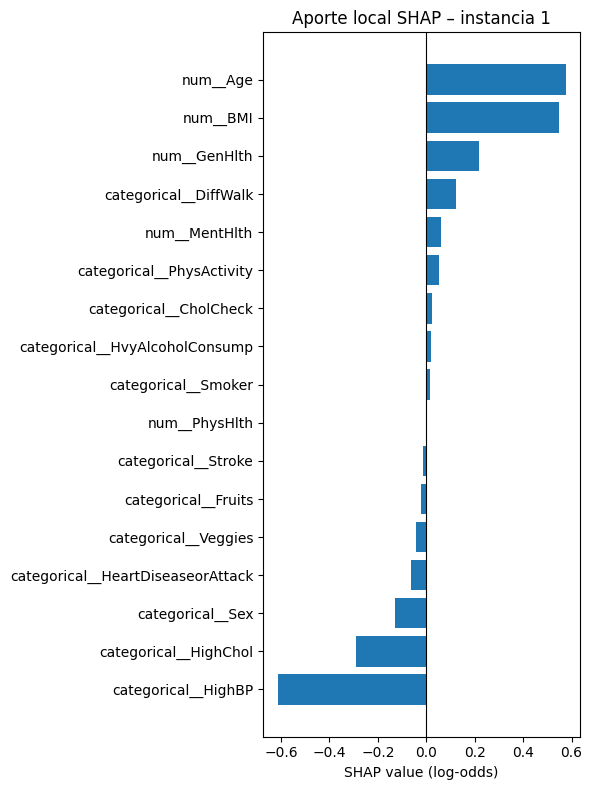

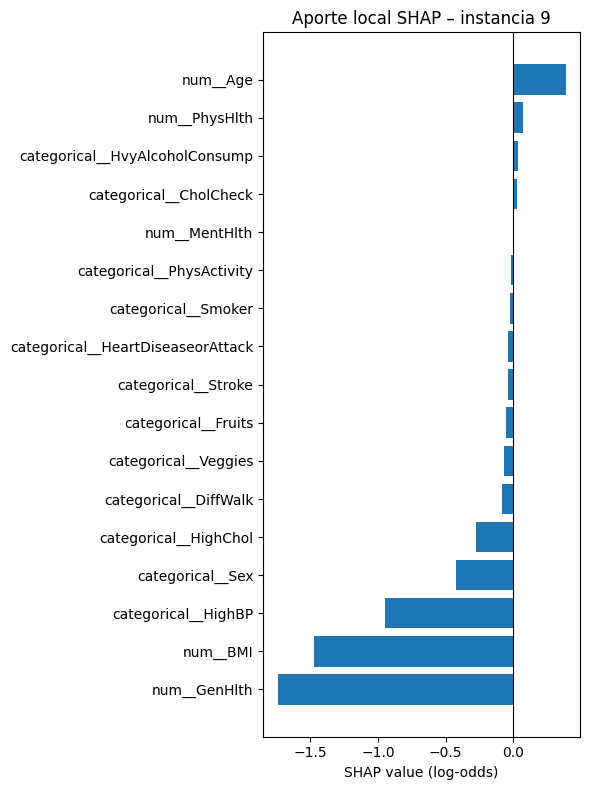

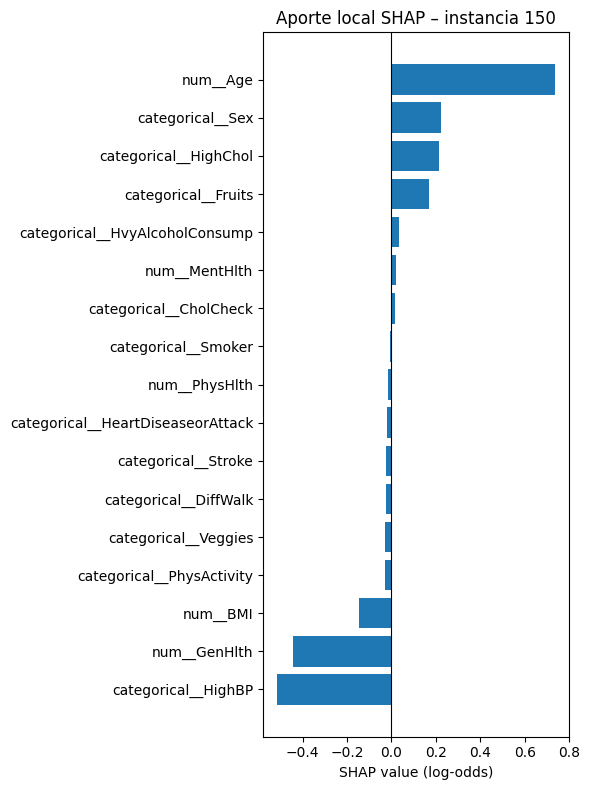

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


# Para cada índice, construimos un pequeño DataFrame con el SHAP value de cada feature
for idx in [1, 9, 150]:
    df_local = pd.DataFrame({
        'feature': feature_names,
        'shap_value': shap_values[idx]
    }).sort_values('shap_value')

    plt.figure(figsize=(6, 8))
    plt.barh(df_local['feature'], df_local['shap_value'])
    plt.axvline(0, color='black', linewidth=0.8)
    plt.title(f"Aporte local SHAP – instancia {idx}")
    plt.xlabel("SHAP value (log-odds)")
    plt.tight_layout()
    plt.show()


#### 5.2.2 ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?

##### **Instancia 1**

* **Principales SHAP positivos** (aumentan la probabilidad):

  * `num__Age` ≈ +0.50
  * `num__BMI` ≈ +0.48
  * `num__GenHlth` ≈ +0.18
  * `categorical__DiffWalk` ≈ +0.11
  * `num__MentHlth` ≈ +0.05
  * `categorical__PhysActivity` ≈ +0.04
* **Principales SHAP negativos** (disminuyen la probabilidad):

  * `categorical__HighBP` ≈ –0.60
  * `categorical__HighChol` ≈ –0.25
  * `categorical__Sex` ≈ –0.15
  * `categorical__HeartDiseaseorAttack` ≈ –0.05

---

##### **Instancia 9**

* **Principales SHAP positivos**:

  * `num__Age` ≈ +0.40
  * `num__PhysHlth` ≈ +0.06
  * `categorical__HvyAlcoholConsump` ≈ +0.02
  * `categorical__CholCheck` ≈ +0.01
* **Principales SHAP negativos**:

  * `num__GenHlth` ≈ –1.60
  * `num__BMI` ≈ –1.20
  * `categorical__HighBP` ≈ –1.00
  * `categorical__Sex` ≈ –0.80
  * `categorical__HighChol` ≈ –0.60


---

##### **Instancia 150**

* **Principales SHAP positivos**:

  * `num__Age` ≈ +0.75
  * `categorical__Sex` ≈ +0.20
  * `categorical__HighChol` ≈ +0.20
  * `categorical__Fruits` ≈ +0.10
* **Principales SHAP negativos**:

  * `categorical__HighBP` ≈ –0.50
  * `num__GenHlth` ≈ –0.30
  * `num__BMI` ≈ –0.15

---

#### ¿Existe algún patrón común entre las instancias?

* **Edad (`num__Age`)** aparece **siempre** con SHAP positivo y como una de los features que más aumentan la probabilidad: edades relativamente mayores tienden a incrementar la predicción de diabetes.
* La **ausencia de hipertensión** (`HighBP=0`) suele tener SHAP negativo en todos los casos: no ser hipertenso protege.
* Variables como **BMI** y **GenHlth** pueden cambiar de signo dependiendo de si el valor de la instancia está por encima o por debajo del promedio de la muestra.
---


#### ¿Es posible generalizar estas conclusiones a todo el dataset?

No directamente. Estas son **interpretaciones locales**, válidas sólo para las observaciones 1, 9 y 150. Para extraer conclusiones globales (por ejemplo, “un BMI alto SIEMPRE empuja hacia diabetes”), necesitamos un resumen de SHAP en todo el conjunto o métodos como el summary\_plot de SHAP. Sólo así podremos confirmar qué variables tienen un efecto consistente en la mayoría de los casos.


### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

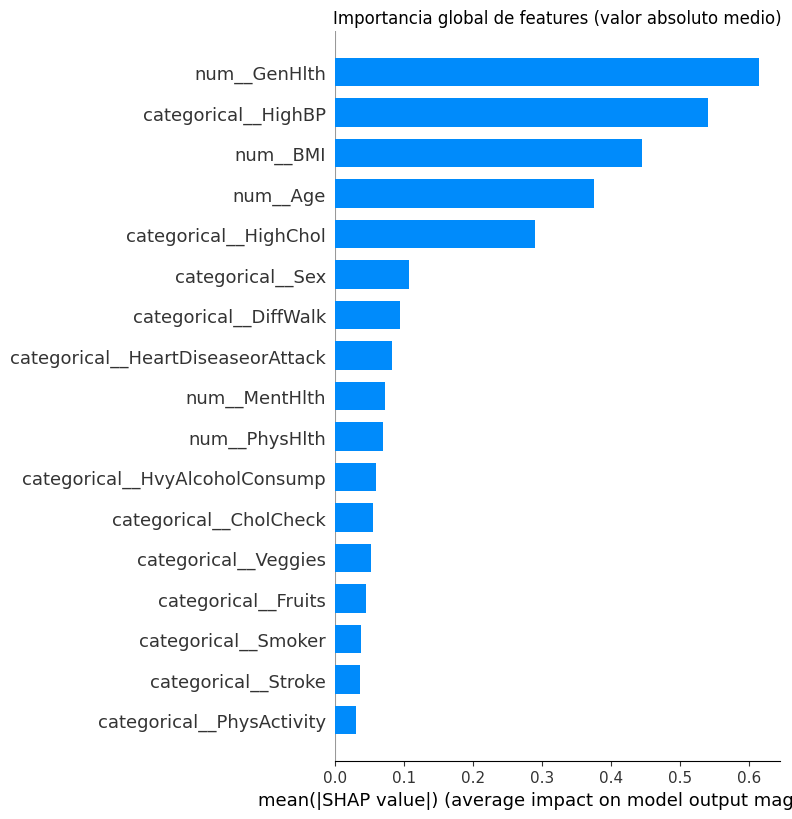

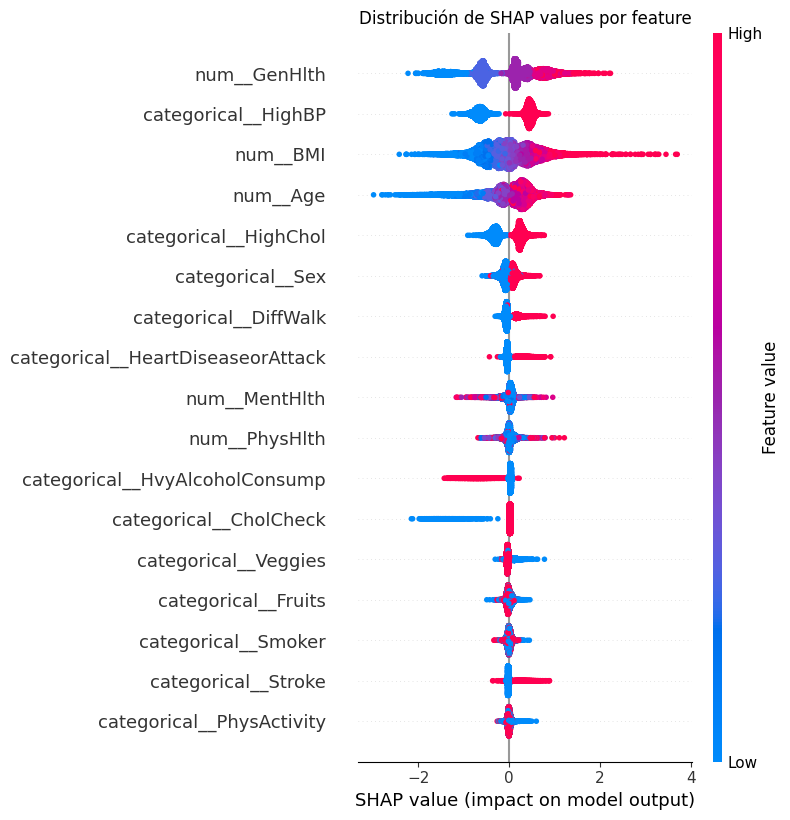

In [22]:
import shap
import matplotlib.pyplot as plt



# 1) Gráfico  “bar” con la importancia media absoluta
plt.figure(figsize=(8,6))
shap.summary_plot(
    shap_values,
    X_test_proc,
    feature_names=feature_names,
    plot_type="bar",
    show=False
)
plt.title("Importancia global de features (valor absoluto medio)")
plt.tight_layout()
plt.show()

# 2) Gráfico  “dot” (beeswarm) para ver distribución de SHAP por feature
plt.figure(figsize=(8,6))
shap.summary_plot(
    shap_values,
    X_test_proc,
    feature_names=feature_names,
    show=False
)
plt.title("Distribución de SHAP values por feature")
plt.tight_layout()
plt.show()


#### Interpretación
A nivel global vemos que, en promedio, las cinco features que más mueven la predicción son GenHlth, HighBP, BMI, Age y HighChol, y que “valores altos” de estas variables tienden a empujar la probabilidad hacia diabetes.

En cambio, el análisis local (instancias 1, 9 y 150) muestra cómo cada feature concreta contribuye en cada paciente: allí puede que BMI sea positivo en un caso pero negativo en otro si el valor de ese individuo está por encima o por debajo del umbral.


### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

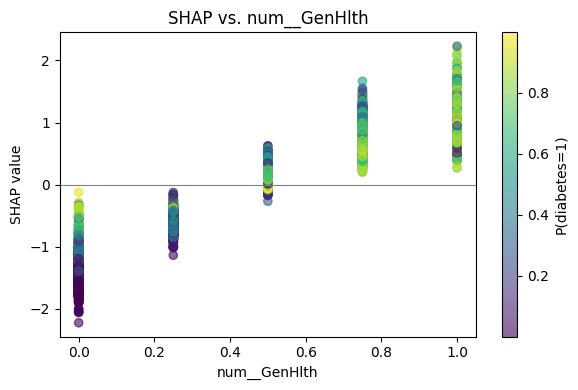

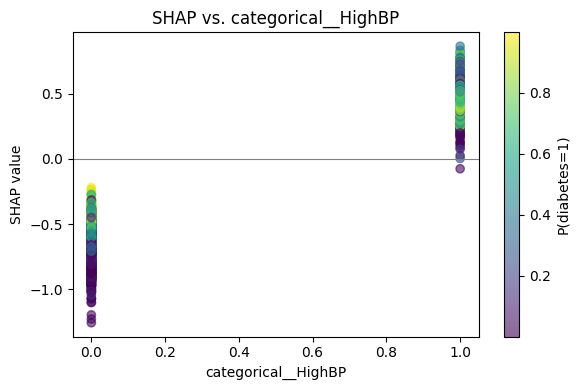

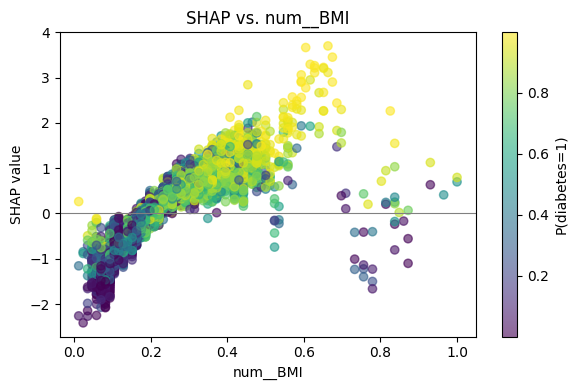

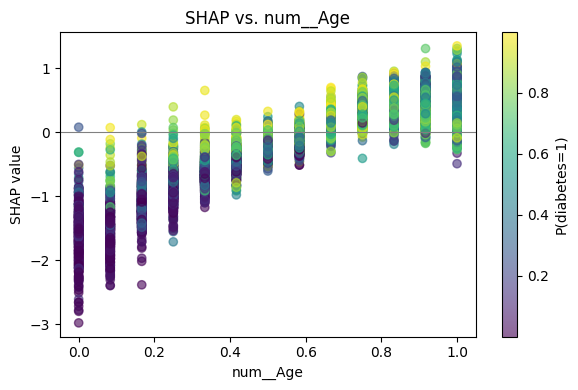

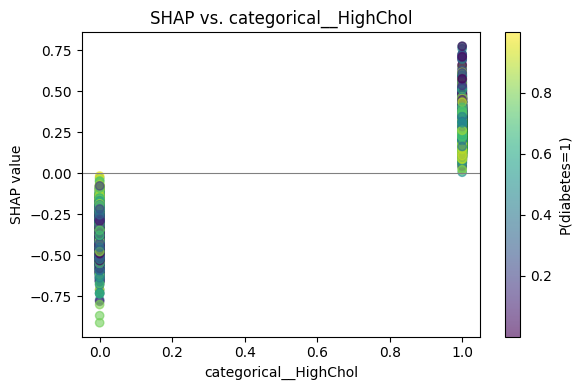

In [23]:
# 1) Calcular probabilidades de diabetes para cada observación
probs = pipeline.predict_proba(X_test)[:, 1]

# 2) Definir top-5 features globales
top5 = [
    "num__GenHlth",
    "categorical__HighBP",
    "num__BMI",
    "num__Age",
    "categorical__HighChol"
]

# 3) Para cada feature, extraer su índice y graficar
for feat in top5:
    idx = list(feature_names).index(feat)
    x = X_test_proc[feat]
    y = shap_values[:, idx]

    plt.figure(figsize=(6,4))
    sc = plt.scatter(x, y, c=probs, cmap="viridis", alpha=0.6)
    plt.colorbar(sc, label="P(diabetes=1)")
    plt.axhline(0, color="grey", linewidth=0.8)
    plt.xlabel(feat)
    plt.ylabel("SHAP value")
    plt.title(f"SHAP vs. {feat}")
    plt.tight_layout()
    plt.show()


En todos los plots se confirma que las cinco variables más importantes globalmente tienen una relación clara y coherente entre su valor, su SHAP value y la probabilidad de diabetes:

Existe una pendiente clara (o salto binario) que une el valor de la feature con el SHAP.

Un SHAP positivo siempre se corresponde con alta probabilidad de diabetes (puntos amarillos/claros arriba), y uno negativo con baja probabilidad (azul abajo).

Confirman la monotonía y la dirección consistente de cada variable indicada por el análisis global.

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

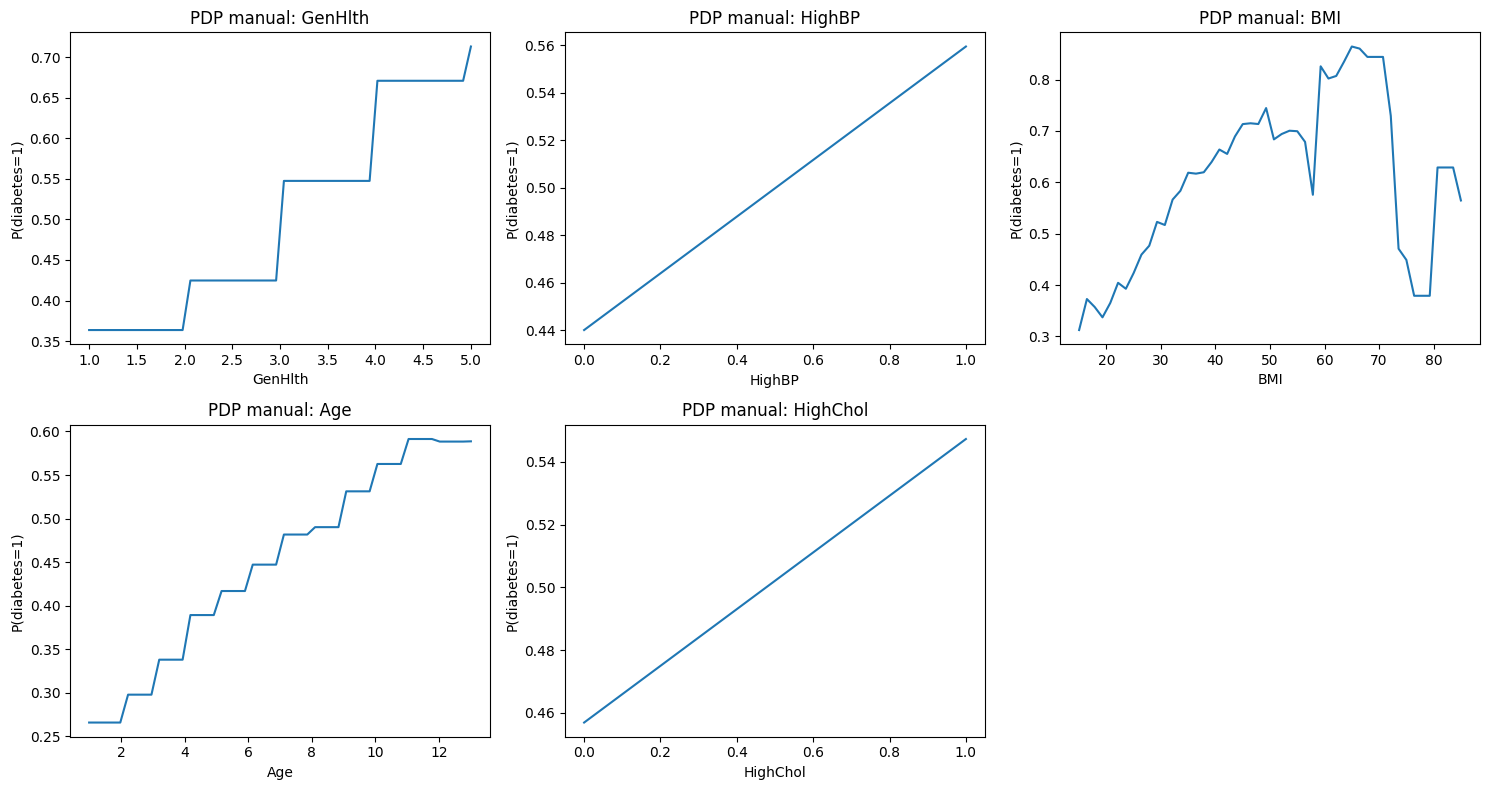

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Submuestra de 1 000 observaciones
X_sub = X_test.sample(n=1000, random_state=rs)

# Top-5 globales
features = ["GenHlth", "HighBP", "BMI", "Age", "HighChol"]

# Crear un grid de 2×3 para los plots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, feat in enumerate(features):
    ax = axes.flat[i]

    # Definir el grid de valores
    if X_sub[feat].nunique() > 2:  # continuo
        grid = np.linspace(X_sub[feat].min(), X_sub[feat].max(), 50)
    else:  # binario
        grid = np.array(sorted(X_sub[feat].unique()))

    pdp = []
    for val in grid:
        X_temp = X_sub.copy()
        X_temp[feat] = val
        pdp.append(pipeline.predict_proba(X_temp)[:, 1].mean())

    ax.plot(grid, pdp)
    ax.set_title(f"PDP manual: {feat}")
    ax.set_xlabel(feat)
    ax.set_ylabel("P(diabetes=1)")

# Eliminar el subplot sobrante
fig.delaxes(axes.flat[-1])
plt.tight_layout()
plt.show()



* **GenHlth**: A medida que empeora la salud general (de 1 “excelente” a 5 “pobre”), la probabilidad media de diabetes sube de \~0.36 a \~0.72.
* **HighBP**: Paso limpio de \~0.44 a \~0.56 al cambiar de “no hipertenso” a “hipertenso”.
* **BMI**: Riesgo bajo para IMC <25 (\~0.30–0.40), luego aumento casi lineal hasta un pico alrededor de IMC=60 (\~0.85), y ligera caída en valores extremos (por pocas muestras).
* **Age**: Subida casi lineal de \~0.27 en los más jóvenes a \~0.60 en los de mayor edad.
* **HighChol**: Otro paso claro, de \~0.46 a \~0.55 al pasar de “no colesterol alto” a “colesterol alto”.

**Generalizabilidad**
Estos PDP están calculados sobre una submuestra representativa de 1 000 casos, de modo que reflejan la tendencia **promedio** del modelo en todo el dataset. Las curvas monotónicas y los “saltos” en las variables binarias concuerdan con el análisis global de SHAP: valores más altos de GenHlth, BMI, Age y la presencia de HighBP o HighChol incrementan sistemáticamente la probabilidad de diabetes. Solo en los extremos (p. ej. BMI muy alto) aparecen artefactos por escasez de datos, pero las conclusiones principales son **generalizables** al conjunto completo.


## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [25]:
from alibi.explainers import AnchorTabular

In [26]:
preprocessor = pipeline.named_steps['preprocessor']
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
model = pipeline.named_steps['model'].fit(X_train_processed, y_train)
predict_fn = lambda x: model.predict(x) # creamos función de predicción
explainer = AnchorTabular(predict_fn, model.feature_names_in_, seed=rs) # instanciamos Anchor usando función creada
explainer.fit(X_train_processed.to_numpy())

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 42, 'disc_perc': (25, 50, 75)},
  'version': '0.9.6'}
)

In [27]:
import operator

def rules_system(idx):
    ops = {
        '=': operator.eq,
        '<=': operator.le,
        '>=': operator.ge,
        '<': operator.lt,
        '>': operator.gt
    }

    obs = np.array(X_test_processed.iloc[idx], ndmin=2)
    explanation = explainer.explain(obs, threshold=0.95)
    anchor = explanation.anchor
    pred_label = explainer.predictor(obs)[0]

    print(f"--- Observación {idx} ---")
    print('Prediction: ', pred_label)
    print('Anchor: %s' % (' AND '.join(anchor)))

    covered = X_test_processed.copy()
    for feature in anchor:
        matched = False
        for symbol, func in ops.items():
            if f' {symbol} ' in feature:
                feat, val = feature.split(f' {symbol} ')
                val = type(X_test_processed[feat].iloc[0])(val)
                covered = covered[func(covered[feat], val)]
                matched = True
                break
        if not matched:
            print(f"[!] Regla ignorada: {feature}")

    total_covered = len(covered)
    correct_preds = np.sum(model.predict(covered) == pred_label)
    global_precision = correct_preds / total_covered if total_covered > 0 else 0

    print(f"Población explicada por la regla: {total_covered} ejemplos")
    print(f"Precisión en población cubierta: {global_precision:.2f}")
    print()


idxs = [1000, 3001, 5751]
for idx in idxs:
    rules_system(idx)


--- Observación 1000 ---
Prediction:  1
Anchor: num__Age > 0.83 AND categorical__HeartDiseaseorAttack > 0.00 AND categorical__HighBP > 0.00
Población explicada por la regla: 1327 ejemplos
Precisión en población cubierta: 0.94

--- Observación 3001 ---
Prediction:  1
Anchor: num__BMI > 0.24 AND categorical__HighBP > 0.00 AND num__GenHlth > 0.25
Población explicada por la regla: 3943 ejemplos
Precisión en población cubierta: 0.97

--- Observación 5751 ---
Prediction:  0
Anchor: num__GenHlth <= 0.25 AND categorical__HighBP <= 0.00 AND num__BMI <= 0.15
Población explicada por la regla: 2224 ejemplos
Precisión en población cubierta: 1.00



Notamos que para las 3 observaciones se obtiene una alta precisión, pero no lograr cubrir a una gran cantidad de población dado los 70.000 ejemplos que tiene el dataset aproximadamente. A pesar de no poder representar a tanta población, resulta más importante la precisión, pues implica que para cada subgrupo se puede determinar con mucha precisión si posee diabetes o no siguiendo esas reglas. Lo que no se puede concluir es que estas reglas pueden generalizar las predicciones para todo el conjunto de datos.

Con esto en mente, hablando de forma local cada regla tiene harta coherencia, pues permite explicar de cierta manera las razones detras del diagnostico (o no) de diabetes, dando resultados cuantitativos. Además, notamos que se utilizan las features que en las secciones pasadas fueron relevantes.

Nota: Las features que fueron escaladas se pueden transformar a su valor original para una mayor interpretación. De todas maneras, en escala 0 a 1 se pueden interpretar como percentiles en la población.

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

**Mejores conclusiones globales**
Para entender **qué variables** mueven en promedio la predicción—y **cómo** lo hacen—los métodos agnósticos globales (permutation importance + SHAP summary + PDP) son superiores.

* **Permutation importance** confirmó la robustez del top-5 (GenHlth, HighBP, BMI, Age, HighChol) y permitió ver su variabilidad.
* **PDP** mostró la forma y monotonicidad de cada relación (p. ej. riesgo creciente con IMC y edad).
* **SHAP summary** unificó magnitud y dirección en un solo gráfico beeswarm.

**Mejores conclusiones locales**
Para entender **por qué** el modelo predice diabetes en un paciente concreto, **SHAP values** y **Anchor rules** ofrecen explicaciones claras:

* SHAP asigna a cada feature su aporte (positivo/negativo) en la predicción.
* Anchor rules traduce esa lógica a condiciones “if–then” que un médico o paciente entiende directamente.

---

### 2. ¿Local o global para Dr. Simi?

* **Global** es clave en la **fase de modelado y validación**: permite al equipo médico identificar los factores de riesgo más relevantes en toda la población atendida, diseñar protocolos de prevención (p. ej. campañas de control de presión y peso) y garantizar robustez del modelo.
* **Local** es fundamental para la **comunicación clínica**: cada paciente recibe una explicación personalizada (“su alto BMI y su presión elevada aumentan su riesgo de diabetes”), lo que aumenta la confianza y facilita la discusión personalizada del plan de tratamiento.


> * Durante el **desarrollo** y la **toma de decisiones a nivel poblacional**, los métodos **agnósticos globales** (permutations, PDP, SHAP summary) entregan las mejores conclusiones.
> * Para el **uso en clínica**, donde Dr. Simi necesita **justificar y discutir** predicciones con sus pacientes, los métodos **locales** (SHAP values, Anchor rules) resultan más útiles y efectivos.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>